### 1) Cabin 결측 여부를 변수로 만든 뒤 상관계수 히트맵 그리기

`Cabin` 컬럼의 결측 여부를 0/1로 표현하는 새로운 변수 `CabinMissing`을 만들고, 이를 포함한 상관계수 히트맵을 그리시오.

조건: `PassengerId` 제외, `cmap="coolwarm"`, `vmin=-1`, `vmax=1`

힌트

- `Cabin.isna()`
- `astype(int)`
- `corr(numeric_only=True)`

Text(0.5, 1.0, 'Cabin Missing Heatmap')

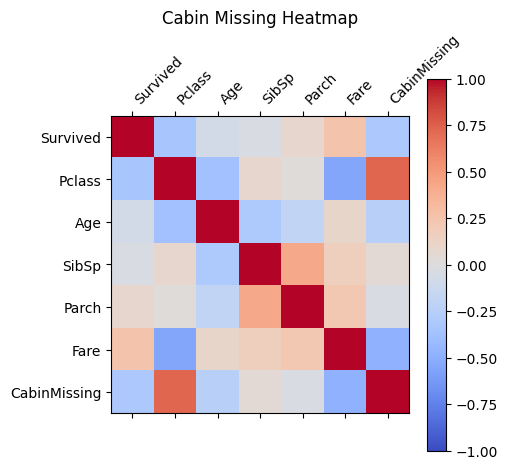

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
titanic = pd.read_csv("./titanic.csv")  #Cabon은 객실번호
titanic02 = titanic.copy()
#print(titanic02)
titanic02["CabinMissing"] = titanic02["Cabin"].isna().astype(int)
corr_matrix = titanic02.drop("PassengerId", axis=1).corr(numeric_only=True)  #행렬 연산 -1~0~1
#print(titanic02["CabinMissing"])
plt.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)  
#테이터의 최소 / 최대값을 사용 -1~0~1  만약 vmax, vmin이 없으면 만약 최대값이 0.4면 0.4가 제일 빨간색이 된다.
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha="left")
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Cabin Missing Heatmap")
